In [285]:
import numpy as np
from sklearn.datasets import fetch_mldata
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

# CIFAR10 simple example
lets start with setting up keras/tensorflow



# Anaconda/Miniconda
https://conda.io/miniconda.html

- create a virtual environment

    `conda create --name py36_keras anaconda python=3.6`

- activate it via 

    `source activate py36_keras` (linux/mac specific)

- install a few packages
    - [tensorflow howto](https://www.tensorflow.org/install/)
    
     `pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.3.0-cp36-cp36m-linux_x86_64.whl`
     
    - [keras](https://keras.io/#installation)
    
     `pip install keras`
     




In [1]:
# conda create --name py36_keras anaconda python=3.6
# source activate py36_keras
# pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.3.0-cp36-cp36m-linux_x86_64.whl
# https://www.tensorflow.org/install/
# pip install keras


# MNIST dataset
a collection of handwritten digits 0-9, as 28x28 pixels 

In [ ]:
mnist = fetch_mldata('MNIST original')
X, y = mnist.data.astype(np.float32), mnist.target
input_shape = 784

# for speed's sake, we'll just use a subset here
X = X[::10]
y = y[::10]

Usually the images are flattened to a single vector of 784

In [54]:
X[0].shape

(784,)

In [55]:
print('#samples:', len(X))

#samples: 7000


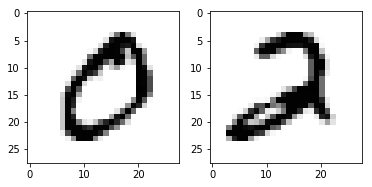

In [294]:
def plot_sample(x,y=None):
    plt.imshow(x.reshape(28,28), cmap=plt.cm.Greys)
    if y: plt.title(y)
        
plt.figure()
plt.subplot(121)
plot_sample(X[0])
plt.subplot(122)
plot_sample(X[1500])

# CIFAR10
- see this [website](https://www.cs.toronto.edu/~kriz/cifar.html)
- "The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class."
- airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

- more interesting than MNIST, which is just too easy

In [328]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

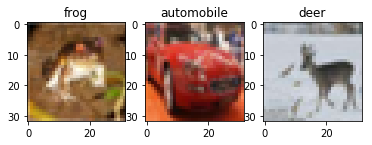

In [332]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X = np.concatenate([x_train, x_test], axis=0)
X = X.reshape(-1, 32*32*3) # flatten it
y = np.concatenate([y_train, y_test], axis=0)

# for speed's sake, we'll just use a subset here
X = X[::5]
y = y[::5]

input_shape = 3072

def plot_sample(x,y=None):
    plt.imshow(x.reshape(32,32,3))
    if y: plt.title(y)

plt.figure()
plt.subplot(131)
plot_sample(X[0], class_names[y[0][0]])
plt.subplot(132)
plot_sample(X[1], class_names[y[1][0]])
plt.subplot(133)
plot_sample(X[4], class_names[y[4][0]])

In [311]:
# we need a one-hot encoding of the labels
y = to_categorical(y)

# also mix up the ordering of the samples (just in case they were ordered)
ix = np.random.permutation(len(y))
X, y = X[ix], y[ix]

# also NORMALIZATION!!
cifar_mean = X.mean(axis=0, keepdims=True)
cifar_std = X.std(axis=0, keepdims=True)
X = (X - cifar_mean)/(cifar_std+1e-10)

## A simple Multilayer Perceptron

In [316]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

def MLP_factory(n_hidden):
    MLP = Sequential()
    MLP.add(InputLayer(input_shape=(input_shape,)))
    MLP.add(Dense(units=n_hidden, activation='relu'))
    MLP.add(Dense(units=10, activation='softmax'))
    
    # define a loss function and optimizer
    MLP.compile(loss='categorical_crossentropy',
                  optimizer='adam',   # or 'sge' as simplest case
                  metrics=['accuracy'])

    return MLP

def DNN_factory(n_hidden1, n_hidden2):
    DNN = Sequential()
    DNN.add(InputLayer(input_shape=(input_shape,)))
    DNN.add(Dense(units=n_hidden1, activation='relu'))
    DNN.add(Dense(units=n_hidden2, activation='relu'))

    DNN.add(Dense(units=10, activation='softmax'))
    
    # define a loss function and optimizer
    DNN.compile(loss='categorical_crossentropy',
                  optimizer='adam',   # or 'sge' as simplest case
                  metrics=['accuracy'])

    return DNN

MLP = MLP_factory(n_hidden=1000)

In [317]:
MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 1000)              3073000   
_________________________________________________________________
dense_109 (Dense)            (None, 10)                10010     
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


the actual fitting.
- **epochs**: number of complete passes over the dataset
- **batch_size**: calculate the gradients/updates not for the entire dataset, but for smaller partitions
    - it's faster
    - more gradient updates overall
    - more noisy (which is actually good! -> local minima)

In [320]:
h = MLP.fit(X, y, epochs=10, batch_size=512)

Epoch 1/10
6000/6000 [==============================] - 2s - loss: 0.8934 - acc: 0.7160     
Epoch 2/10
6000/6000 [==============================] - 2s - loss: 0.7990 - acc: 0.7495     
Epoch 3/10
6000/6000 [==============================] - 2s - loss: 0.6701 - acc: 0.7987     
Epoch 4/10
6000/6000 [==============================] - 2s - loss: 0.5907 - acc: 0.8382     
Epoch 5/10
6000/6000 [==============================] - 2s - loss: 0.5045 - acc: 0.8685     
Epoch 6/10
6000/6000 [==============================] - 2s - loss: 0.4502 - acc: 0.8862     
Epoch 7/10
6000/6000 [==============================] - 2s - loss: 0.3677 - acc: 0.9180     
Epoch 8/10
6000/6000 [==============================] - 2s - loss: 0.3409 - acc: 0.9280     
Epoch 9/10
6000/6000 [==============================] - 2s - loss: 0.2841 - acc: 0.9525     
Epoch 10/10
6000/6000 [==============================] - 2s - loss: 0.2370 - acc: 0.9635     


In [321]:
# plot the performance/loss over time
plot_training(h)

NameError: name 'plot_training' is not defined

# Whats the issue here?

# Overfitting
- Performance on the training set tells you **nothing** about **generalization**
- let's split into a training set and a test-set

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Training set: %d, Test set: %d' %(len(X_train), len(X_test)))

Training set: 4500, Test set: 1500


In [323]:
# MLP = DNN_factory(n_hidden1=100, n_hidden2=20)
MLP = MLP_factory(n_hidden=1000)
h = MLP.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=512)

Train on 3375 samples, validate on 1125 samples
Epoch 1/10
3375/3375 [==============================] - 2s - loss: 4.6357 - acc: 0.2169 - val_loss: 4.0621 - val_acc: 0.2907
Epoch 2/10
3375/3375 [==============================] - 1s - loss: 2.9045 - acc: 0.3612 - val_loss: 3.1616 - val_acc: 0.3182
Epoch 3/10
3375/3375 [==============================] - 1s - loss: 2.0271 - acc: 0.4581 - val_loss: 2.4362 - val_acc: 0.3662
Epoch 4/10
3375/3375 [==============================] - 1s - loss: 1.4098 - acc: 0.5547 - val_loss: 2.3515 - val_acc: 0.3556
Epoch 5/10
3375/3375 [==============================] - 1s - loss: 1.0736 - acc: 0.6533 - val_loss: 2.3653 - val_acc: 0.3298
Epoch 6/10
3375/3375 [==============================] - 1s - loss: 0.8653 - acc: 0.7212 - val_loss: 2.1637 - val_acc: 0.3733
Epoch 7/10
3375/3375 [==============================] - 1s - loss: 0.6706 - acc: 0.7944 - val_loss: 2.1461 - val_acc: 0.3627
Epoch 8/10
3375/3375 [==============================] - 1s - loss: 0.5548 - a

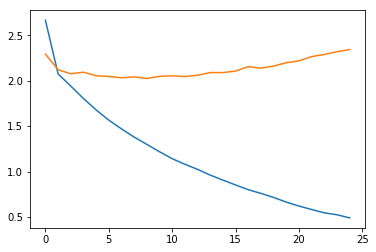

In [228]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [229]:
# model predictions on the test set
ytest_hat = MLP.predict(X_test)

In [283]:
## some evaluation on the test-set
from talk_utils import plot_confusion_matrix, plot_training
plot_confusion_matrix(y_test, ytest_hat, classes=range(10));

ImportError: cannot import name 'plot_training'

# CNNs: a more suitable model for images
Images pixels are not just features, but they have more structure:
- strong **spatial correlations** in the pixels
- **translation invariance**

-> **convolutions**

![Alt text](kernel_convolution.jpg "Convolution")
[Source](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html)

see [CS231n: Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) for a good tutorial

In [327]:
from keras.layers import Conv2D, MaxPool2D, Reshape, Flatten, Dropout
from keras import optimizers
def CNN_factory(nfilter1, nfilter2, n_hidden1, n_hidden2, learning_rate=0.001):
    DNN = Sequential()
    DNN.add(InputLayer(input_shape=(32,32,3)))
    
    DNN.add(Conv2D(filters=nfilter1, kernel_size=(5,5), activation='relu'))
    DNN.add(MaxPool2D(pool_size=(2,2)))

    DNN.add(Conv2D(filters=nfilter2, kernel_size=(5,5), activation='relu'))
    DNN.add(MaxPool2D(pool_size=(2,2)))
    
    DNN.add(Flatten())
        
    DNN.add(Dense(units=n_hidden1, activation='relu'))

    DNN.add(Dropout(rate=0.5))

    DNN.add(Dense(units=n_hidden2, activation='relu'))
    DNN.add(Dropout(rate=0.5))
    
    DNN.add(Dense(units=10, activation='softmax'))
    
    # define a loss function and optimizer
    opt = optimizers.Adam(lr=learning_rate)

    
    DNN.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return DNN

CNN = CNN_factory(nfilter1=64, nfilter2=64, n_hidden1=100, n_hidden2=20)
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_118 (Dense)            (None, 100)               160100    
__________

In [264]:
CNN = CNN_factory(nfilter1=32, nfilter2=64, n_hidden1=100, n_hidden2=20, learning_rate=0.001)

h = CNN.fit(X_train.reshape(-1,32,32,3), y_train, validation_split=0.25, epochs=100, batch_size=512)

Train on 3375 samples, validate on 1125 samples
Epoch 1/25
3375/3375 [==============================] - 37s - loss: 1.7076 - acc: 0.3659 - val_loss: 1.6025 - val_acc: 0.4142
Epoch 2/25
3375/3375 [==============================] - 54s - loss: 1.6978 - acc: 0.3636 - val_loss: 1.5902 - val_acc: 0.4169
Epoch 3/25
3375/3375 [==============================] - 18s - loss: 1.6586 - acc: 0.3624 - val_loss: 1.5699 - val_acc: 0.4133
Epoch 4/25
3375/3375 [==============================] - 67s - loss: 1.6325 - acc: 0.3819 - val_loss: 1.5532 - val_acc: 0.4258
Epoch 5/25
3375/3375 [==============================] - 46s - loss: 1.6340 - acc: 0.3721 - val_loss: 1.5471 - val_acc: 0.4302
Epoch 6/25
3375/3375 [==============================] - 20s - loss: 1.6401 - acc: 0.3784 - val_loss: 1.5339 - val_acc: 0.4240
Epoch 7/25
3375/3375 [==============================] - 82s - loss: 1.6062 - acc: 0.3973 - val_loss: 1.5268 - val_acc: 0.4276
Epoch 8/25
3375/3375 [==============================] - 28s - loss: 1.

KeyboardInterrupt: 

In [282]:
plot_training(h)

NameError: name 'plot_training' is not defined

In [333]:
ytest_hat = CNN.predict(X_test.reshape(-1,32,32,3))
plot_confusion_matrix(y_test, ytest_hat, classes=class_names);

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1500]

visualize the set of filters learned in the first conv-layer
- (x,y,c,filter)

In [ ]:
W = CNN.get_weights()[0]
print(W.shape)

In [1]:
tile_raster_RGB(W.transpose([3,0,1,2]),(6,6), (2,2))

Using TensorFlow backend.


In [ ]:
## we can also look at what input a particular neuron responds most to
